<a href="https://colab.research.google.com/github/nikhilbordekar/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



`Contribution` : `Team`

`Team Members:`

- `Siddharth Patondikar`
- `Anas Malik`
- `Nikhil Bordekar`

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
# plt.style('ggplot')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
review_df = pd.read_csv('Zomato Restaurant reviews.csv')

restaurant_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

### Dataset First View

In [ ]:
# Dataset First Look
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
review_df.shape

(10000, 7)

In [ ]:
restaurant_df.shape

(105, 6)

### Dataset Information

In [ ]:
# Dataset Info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
review_df.duplicated().value_counts()

False    9964
True       36
dtype: int64

In [ ]:
review_df.drop_duplicates(inplace=True)

In [ ]:
restaurant_df.duplicated().value_counts()

False    105
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
review_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [ ]:
review_df.dropna(inplace=True)

In [ ]:
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
restaurant_df.drop('Collections', axis=1, inplace=True)

restaurant_df.dropna(inplace=True)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Defining a function to get cuisines
def count_cuisines(dataframe):
    # Split the comma-separated cuisines and create a list of all cuisines
    all_cuisines = dataframe['Cuisines'].str.split(', ').explode()

    # Use value_counts to count the occurrences of each cuisine
    cuisine_counts = all_cuisines.value_counts().reset_index()
    cuisine_counts.columns = ['Cuisine', 'Count']

    return cuisine_counts

In [ ]:
#Making a new dataframe for cuisines values
cuisine_counts = count_cuisines(restaurant_df)
cuisine_counts

,Cuisine,Count
0,North Indian,60
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Fast Food,15
5,Asian,15
6,Italian,14
7,Desserts,13
8,South Indian,8
9,Bakery,7


In [ ]:
#Checking the ratings
review_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
review_df[review_df['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


Changing the Rating 'Like' to 5 based on the review

In [ ]:
#Changing all ratings to float values
def change_rating(X):
  if X=='Like':
    return float(5)
  else:
    return math.ceil(float(X))

review_df['Rating'] = review_df['Rating'].apply(change_rating)

In [ ]:
review_df['Rating'].value_counts()

5.0    3896
4.0    2420
1.0    1735
3.0    1211
2.0     693
Name: Rating, dtype: int64

In [ ]:
#Converting 'Time' column into datetime
review_df['Time'] = pd.to_datetime(review_df['Time'])
review_df['Time_HM'] =  review_df['Time'].dt.time
review_df["Hour"] = review_df['Time'].dt.hour

In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Time_HM,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,15:54:00,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,14:20:00,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,22:54:00,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,22:11:00,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,21:37:00,21


In [ ]:
restaurant_df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#Converting 'Cost' column into int
restaurant_df['Cost'] = restaurant_df['Cost'].apply(lambda x : int(x.replace(',','')))
restaurant_df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#Merging both dataframes to get restaurant ratings and costs
merged_restaurant = review_df[['Restaurant','Rating']]
merged_restaurant.rename(columns = {'Restaurant':'Name'}, inplace=True)
merged_restaurant = merged_restaurant.merge(restaurant_df[['Name','Cost']], how='left',on='Name')

In [ ]:
#Grouping on restaurant name to find average rating and cost of the restaurant
merged_restaurant = pd.DataFrame(merged_restaurant.groupby('Name').mean()).reset_index()
merged_restaurant.sort_values('Rating',ascending=False, inplace=True)
merged_restaurant

,Name,Rating,Cost
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0
...,...,...,...
78,Shree Santosh Dhaba Family Restaurant,2.83,500.0
57,Mathura Vilas,2.82,500.0
66,Pakwaan Grand,2.71,400.0
10,Asian Meal Box,2.58,200.0


In [ ]:
def get_total_review(metadata):
  metadata = metadata.split(',')
  review = metadata[0].split(' ')[0]
  return review

def get_follower(metadata):
  metadata_ = metadata.split(',')
  follower = metadata_[1].strip().split(' ')[0]
  return follower

In [ ]:
review_df['No of Reviews'] = review_df['Metadata'].apply(get_total_review)

review_df['Followers'] = review_df['Metadata'].apply(get_follower)

IndexError: ignored

In [ ]:
x = review_df.loc[0]['Metadata']
y = x.split(',')[1].strip()
# print(y)
print(y.split(' ')[1])

Followers


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate

#### Chart - 1

Text(0.5, 1.0, 'Distribution of Meal Cost in Restaurants')

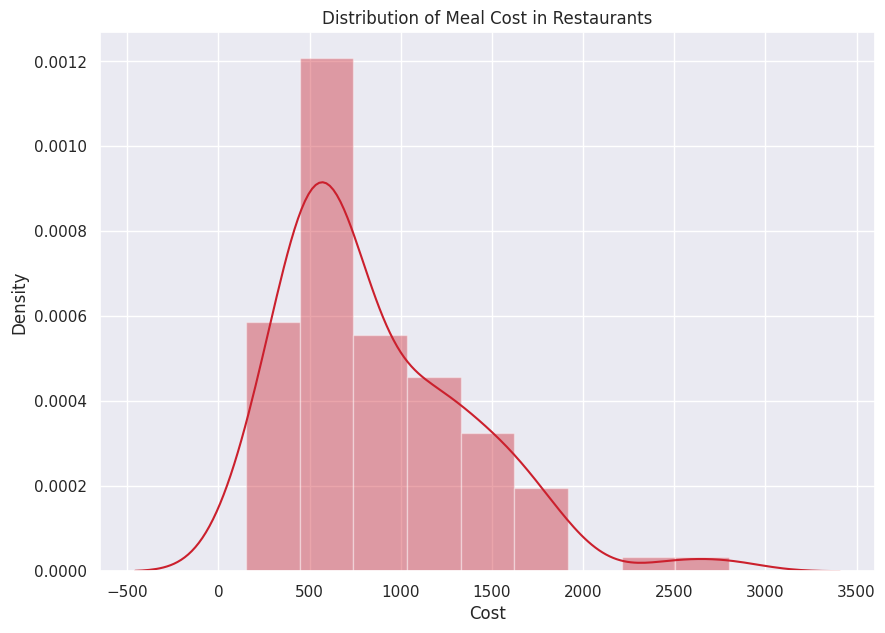

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,7))
sns.distplot(restaurant_df['Cost'], color='#cb202d')
plt.title('Distribution of Meal Cost in Restaurants')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

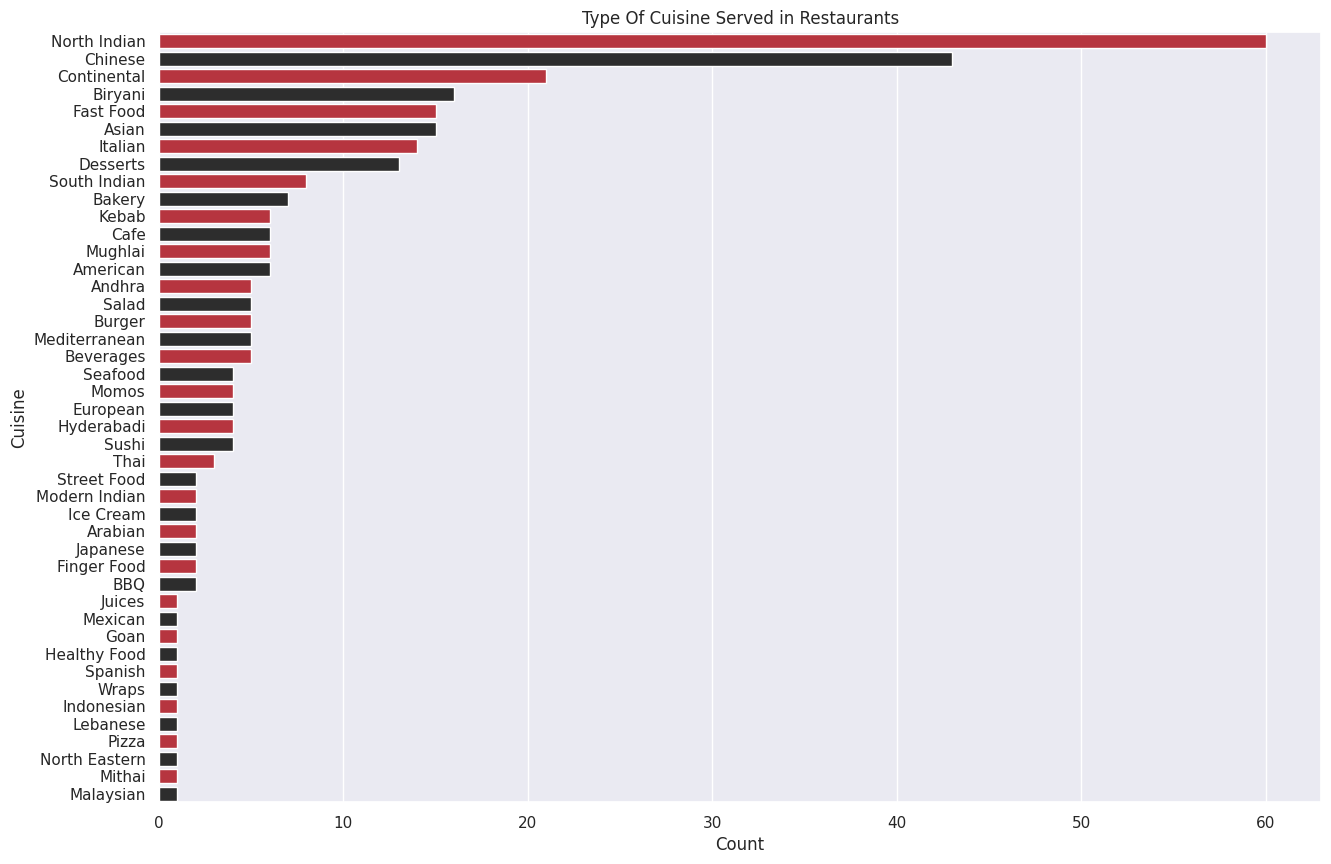

In [ ]:
# Chart - 2 visualization code
#d0d0ce
colors = ['#cb202d', '#2d2d2d'] * (len(cuisine_counts) // 2 + 1)

#Total count of each cuisine
plt.figure(figsize=(15,10))
sns.barplot(data=cuisine_counts, y='Cuisine',x='Count',orient='h', palette=colors)
plt.title("Type Of Cuisine Served in Restaurants")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Distribution of Review Time')

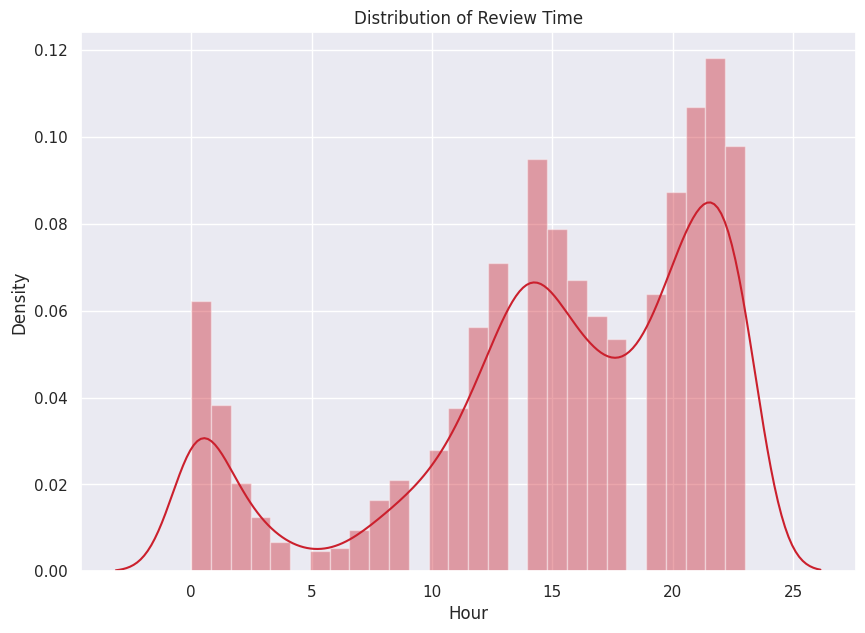

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,7))
sns.distplot(review_df['Hour'],color='#cb202d')
plt.title("Distribution of Review Time")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Distribution of Ratings')

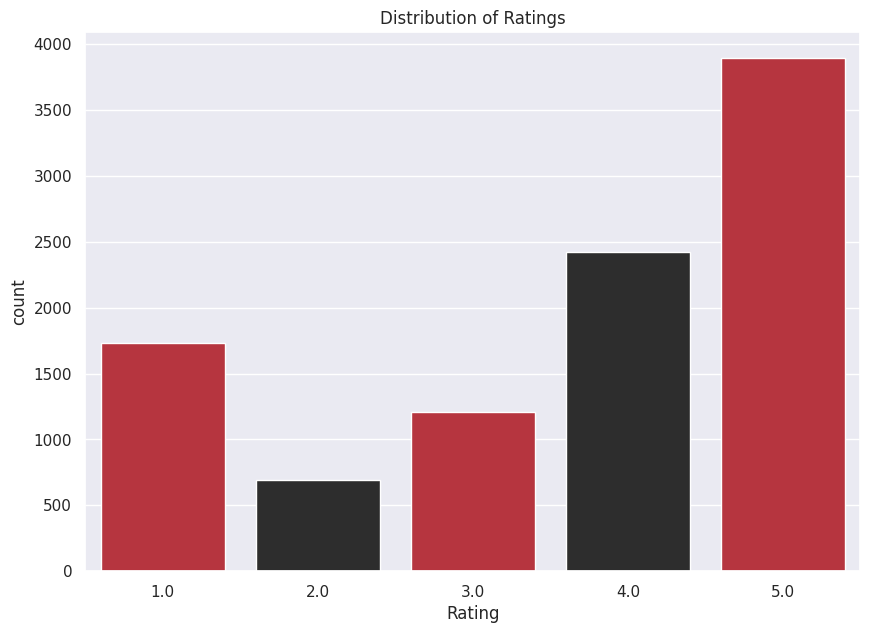

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,7))

#Plotting the distribution of ratings
sns.countplot(data=review_df,x='Rating', palette=colors)
plt.title("Distribution of Ratings")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

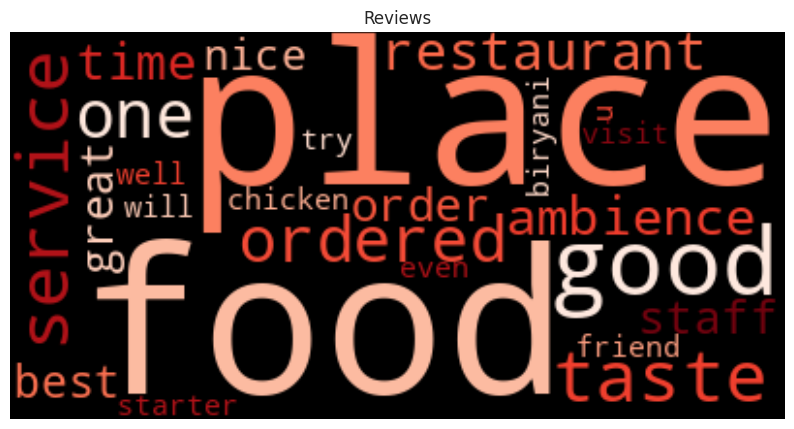

In [ ]:
# Chart - 5 visualization code
#Wordcloud for column review
review = ' '.join(word for word in review_df['Review'].tolist())
wordcloud_title = WordCloud(stopwords=STOPWORDS, background_color='black', min_font_size=15, colormap='Reds_r').generate(review)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_title,interpolation='bilinear')
plt.title('Reviews')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Top 10 Restaurant With Highest Ratings')

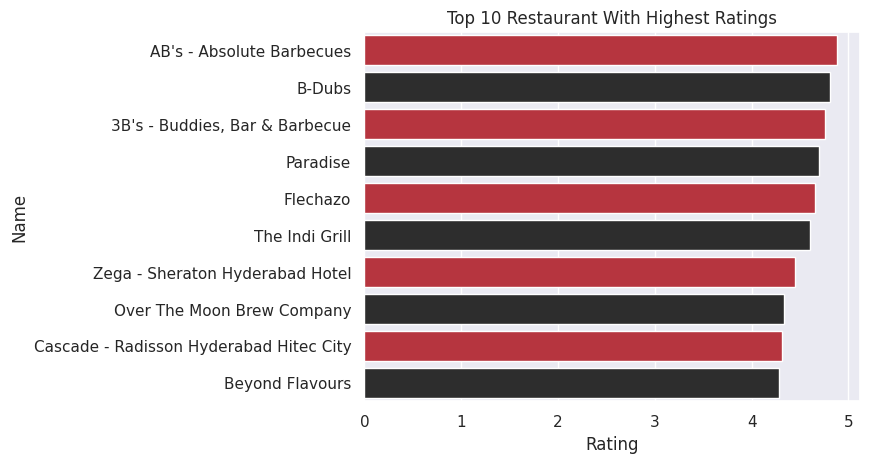

In [ ]:
# Chart - 6 visualization code
# plt.figure(figsize=(10,7))
sns.barplot(data=merged_restaurant[:10], y='Name',x='Rating', palette=colors)
plt.title("Top 10 Restaurant With Highest Ratings")

Text(0.5, 1.0, 'Top 10 Restaurant With Lowest Ratings')

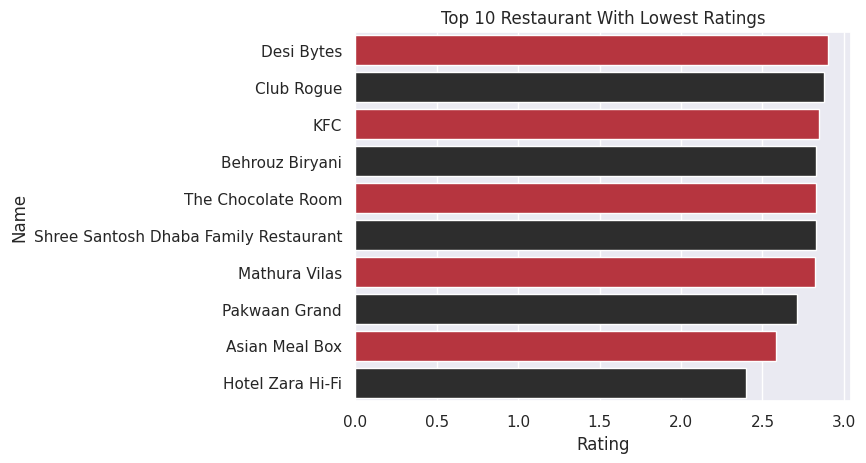

In [ ]:
# plt.figure(figsize=(10,7))
#Plotting top 10 restaurant with lowest ratings
sns.barplot(data=merged_restaurant.tail(10), y='Name',x='Rating', palette=colors)
plt.title("Top 10 Restaurant With Lowest Ratings")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

Text(0.5, 1.0, 'Top 10 Restaurant Average Cost')

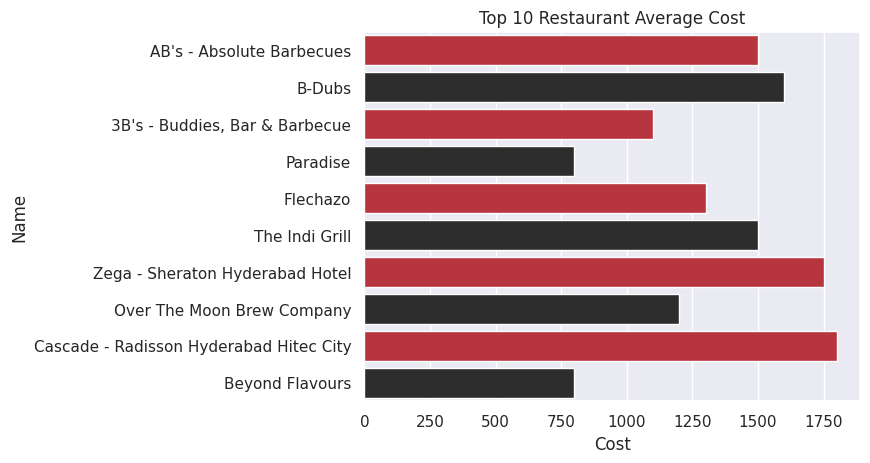

In [ ]:
# Chart - 7 visualization code
sns.barplot(data=merged_restaurant.head(10), y='Name',x='Cost', palette=colors)
plt.title("Top 10 Restaurant Average Cost")

Text(0.5, 1.0, 'Bottom 10 Restaurant Average Cost')

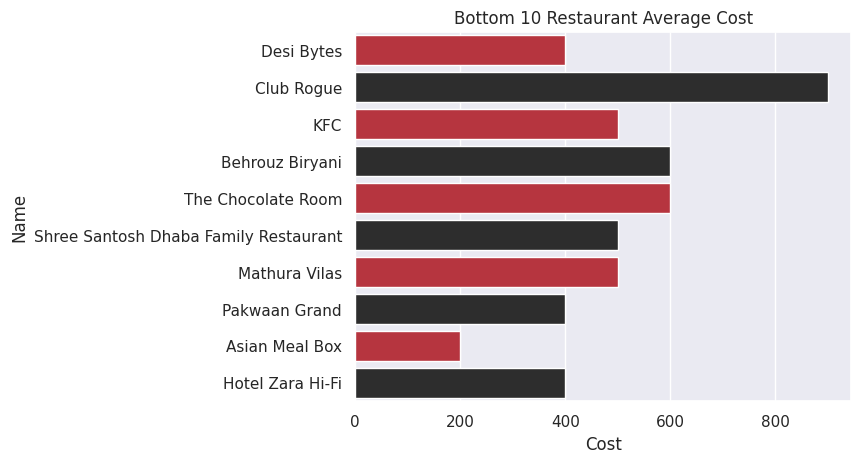

In [ ]:
sns.barplot(data=merged_restaurant.tail(10), y='Name',x='Cost', palette=colors)
plt.title("Bottom 10 Restaurant Average Cost")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***